**Phase separation induced by interaction between herbivore and plant**

**Copyright: Zhenpeng Ge, Quan-xing Liu**

**Licence: MIT Licence**

In [1]:
from numba import jit,prange,cuda
import scipy.io as io
import numpy as np
import cupy as cp
from cupyx.scipy import signal
import math
import matplotlib.pyplot as plt
import pylab

0


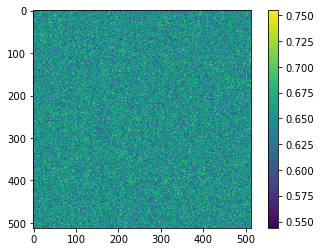

10000


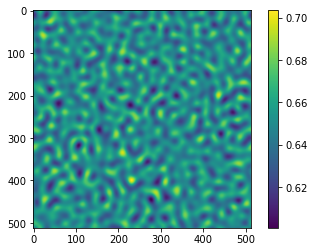

20000


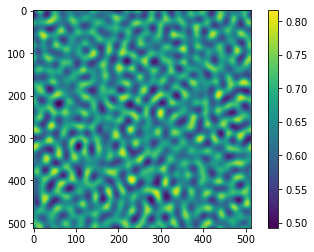

30000


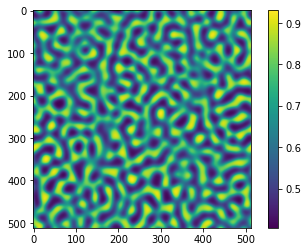

40000


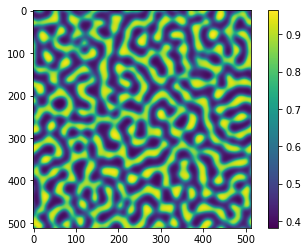

50000


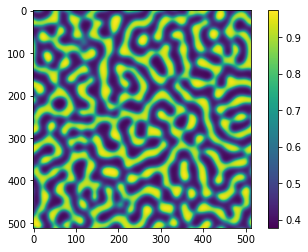

60000


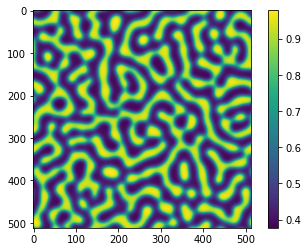

70000


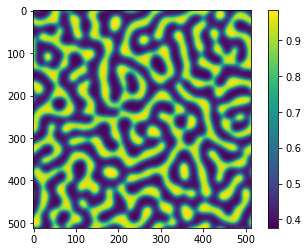

80000


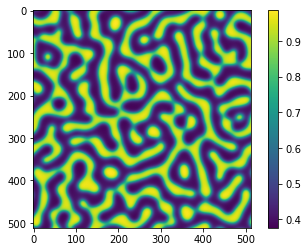

90000


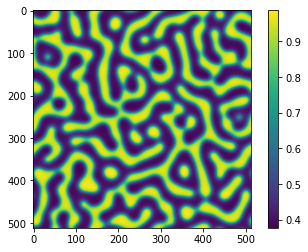

100000


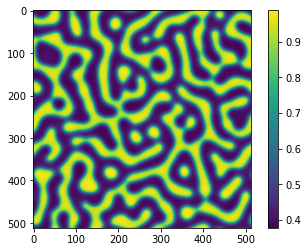

110000


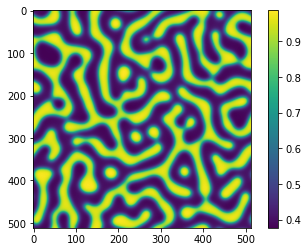

120000


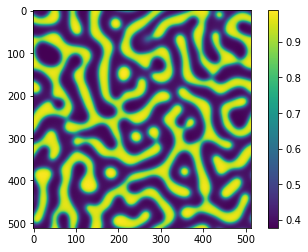

130000


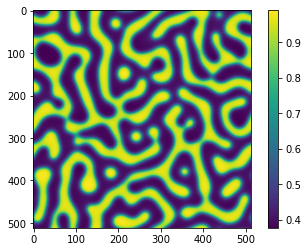

140000


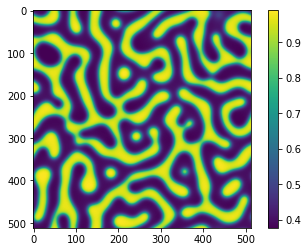

In [ ]:
# Version: pure convolution
DataType=cp.float32

# Grid setting
M        =512
N        =512 
dx       =1
dy       =1
Lengthx  =dx*N
Lengthy  =dy*M

# Time setting
T        =1e7
dt       =cp.float32(0.02)
#Record=np.arange(0,)

# Operator
Laplacian=cp.array([[0,1/(dx*dx),0],[1/(dy*dy),-2/(dx*dx)-2/(dy*dy),1/(dy*dy)],[0,1/(dx*dx),0]],dtype=DataType) 
GradientX=cp.array([[-1/(2*dx),0,1/(2*dx)]],dtype=DataType) 
GradientY=cp.array([[-1/(2*dy)],[0],[1/(2*dy)]],dtype=DataType) 

# Parameter setting
kappa    =cp.float32(0.05) 
D0       =cp.float32(1) 
DP       =cp.float32(1)
alpha    =cp.float32(4)
beta     =cp.float32(0.1)
lambda0  =cp.float32(1)
H_biomass=cp.float32(0.65) # spatial average herbivore biomass

# Initial condition
P=(1.0-H_biomass/lambda0+0.1*(cp.random.rand(M,N)*2.0-1.0)).astype(DataType) 
H=(H_biomass+0.1*(cp.random.rand(M,N)*2.0-1.0)).astype(DataType)
J1X=cp.empty(shape=(M,N),dtype=DataType)
J1Y=cp.empty(shape=(M,N),dtype=DataType)
J2=cp.empty(shape=(M,N),dtype=DataType)
J3X=cp.empty(shape=(M,N),dtype=DataType)
J3Y=cp.empty(shape=(M,N),dtype=DataType)
J4=cp.empty(shape=(M,N),dtype=DataType)

# Loop:
for ttt in range(int(T)):
#    signal.convolve2d(H,GradientX,mode='same',boundary='wrap') # symm
    J1X=(alpha*P**2+beta*P+1)**2*signal.convolve2d(H,GradientX,mode='same',boundary='wrap')+(alpha*P**2+beta*P+1)*H*(2*alpha*P+beta)*signal.convolve2d(P,GradientX,mode='same',boundary='wrap')
    J1Y=(alpha*P**2+beta*P+1)**2*signal.convolve2d(H,GradientY,mode='same',boundary='wrap')+(alpha*P**2+beta*P+1)*H*(2*alpha*P+beta)*signal.convolve2d(P,GradientY,mode='same',boundary='wrap')
    J2=signal.convolve2d(H,Laplacian,mode='same',boundary='wrap')
    J3X=D0*signal.convolve2d(J1X,GradientX,mode='same',boundary='wrap')
    J3Y=D0*signal.convolve2d(J1Y,GradientY,mode='same',boundary='wrap')
    J4=D0*kappa*signal.convolve2d(J2,Laplacian,mode='same',boundary='wrap')
    Pi=lambda0*(1-P)*P-P*H+DP*signal.convolve2d(P,Laplacian,mode='same',boundary='wrap')
    Hi=J3X+J3Y-J4
    P=P+dt*Pi
    H=H+dt*Hi
    if ttt%10000==0:
        print(ttt)
        DataP=cp.asnumpy(P)
        DataH=cp.asnumpy(H)
        fig=plt.figure()
        plt.imshow(DataH)
        plt.colorbar()
        plt.show()